###**IMPORTS**


In [873]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score, log_loss

In [874]:
df = pd.read_csv("/content/software_quality_dataset.csv")
df.head(10)

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Has_Unit_Tests,Code_Owner_Experience,Quality_Label
0,356.0,31,144,69.567047,0.467561,2,Yes,4,Medium
1,227.0,15,104,131.844422,0.795643,2,No,5,High
2,9674.0,47,141,118.729027,0.316839,5,No,1,High
3,6967.0,42,107,194.397155,0.971883,5,Yes,3,Low
4,7954.0,35,114,69.202293,0.559417,1,No,8,Medium
5,2305.0,38,120,164.299559,0.353860,5,No,6,Medium
6,8613.0,22,26,54.968552,0.355856,5,Yes,3,Medium
7,4479.0,5,149,88.060247,0.116470,7,Yes,7,High
8,8167.0,48,165,68.074588,0.723188,1,Yes,6,Low
9,6377.0,13,179,75.227914,0.798353,5,Yes,5,Medium


In [875]:
df.info()
print('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lines_of_Code          1520 non-null   float64
 1   Cyclomatic_Complexity  1600 non-null   int64  
 2   Num_Functions          1600 non-null   int64  
 3   Code_Churn             1520 non-null   float64
 4   Comment_Density        1520 non-null   float64
 5   Num_Bugs               1600 non-null   int64  
 6   Has_Unit_Tests         1600 non-null   object 
 7   Code_Owner_Experience  1600 non-null   int64  
 8   Quality_Label          1600 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 112.6+ KB
Shape of the dataset is (1600, 9). This dataset contains 1600 rows and 9 columns.


###**EDA**


In [876]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions', 'Code_Churn', 'Comment_Density', 'Num_Bugs', 'Code_Owner_Experience']


In [877]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 2 numerical features: 

['Has_Unit_Tests', 'Quality_Label']


####**Descriptive Analysis**

In [878]:
# Transposed stats for numerical features
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lines_of_Code,1520.0,4939.269737,2867.248259,106.000000,2490.750000,4860.000000,7455.250000,9998.000000
Cyclomatic_Complexity,1600.0,25.076875,13.879621,1.000000,13.000000,25.000000,37.000000,49.000000
Num_Functions,1600.0,103.178125,55.503710,5.000000,56.000000,104.000000,152.000000,199.000000
Code_Churn,1520.0,102.572291,50.546329,-64.283310,67.509852,104.007452,138.619113,295.139936
Comment_Density,1520.0,0.549370,0.256137,0.101037,0.337596,0.542108,0.765766,0.999976
Num_Bugs,1600.0,2.934375,1.715928,0.000000,2.000000,3.000000,4.000000,10.000000
Code_Owner_Experience,1600.0,5.045000,2.559701,1.000000,3.000000,5.000000,7.000000,9.000000


In [879]:
# Transposed stats for categorical features
categorical_data.describe().T

,count,unique,top,freq
Has_Unit_Tests,1600,2,No,820
Quality_Label,1600,3,High,566


###**Check the variance**


In [880]:
numerical_data.var()

,0
Lines_of_Code,8.221113e+06
Cyclomatic_Complexity,1.926439e+02
Num_Functions,3.080662e+03
Code_Churn,2.554931e+03
Comment_Density,6.560604e-02
Num_Bugs,2.944409e+00
Code_Owner_Experience,6.552070e+00


**Skew check**

Skewness = 0 → Perfectly symmetrical (e.g., normal distribution)

Skewness < 0 → Left-skewed (long tail on the left)

Skewness > 0 → Right-skewed (long tail on the right)

***=============================================

**Interpretation of Skewness Values:**

Skewness Value Interpretation

~ 0 Symmetrical (normal-ish)

0 to ±0.5 Fairly symmetrical

±0.5 to ±1 Moderately skewed

greater than ±1 Highly skewed



In [881]:
numerical_data.skew()

,0
Lines_of_Code,0.055175
Cyclomatic_Complexity,0.015461
Num_Functions,-0.034194
Code_Churn,-0.113186
Comment_Density,0.004302
Num_Bugs,0.667812
Code_Owner_Experience,-0.042283


Skewness Interpretation

Lines_of_Code (0.055): Almost symmetrical – no transformation needed.

Cyclomatic_Complexity (0.015): Nearly perfectly symmetrical – no concern.

Num_Functions (-0.034): Very slightly left-skewed – not an issue.

Code_Churn (-0.113): Mildly left-skewed – not a big concern.

Comment_Density (0.004): Virtually symmetrical – no transformation required.

Num_Bugs (0.668): Moderately right-skewed – may benefit from transformation.

Code_Owner_Experience (-0.042): Almost symmetrical – no action needed.

### **Histograms and Box Plot**


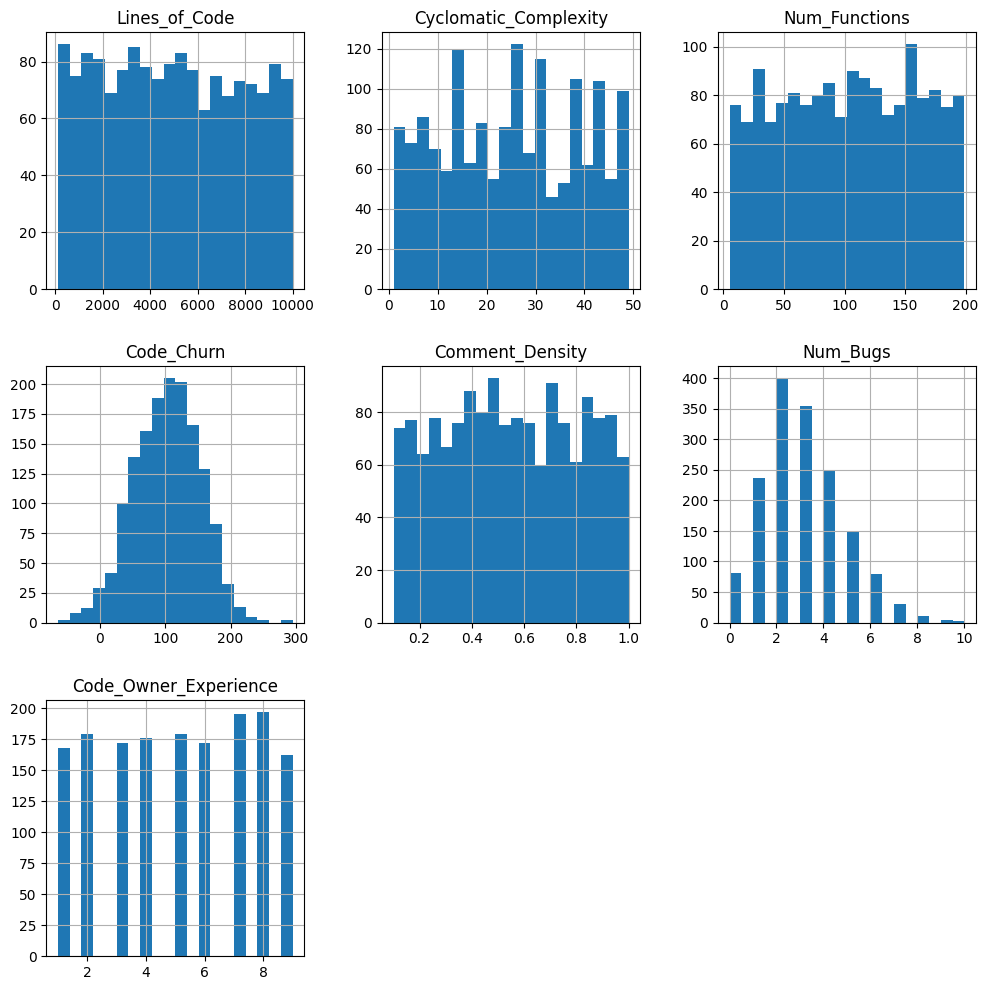

In [882]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

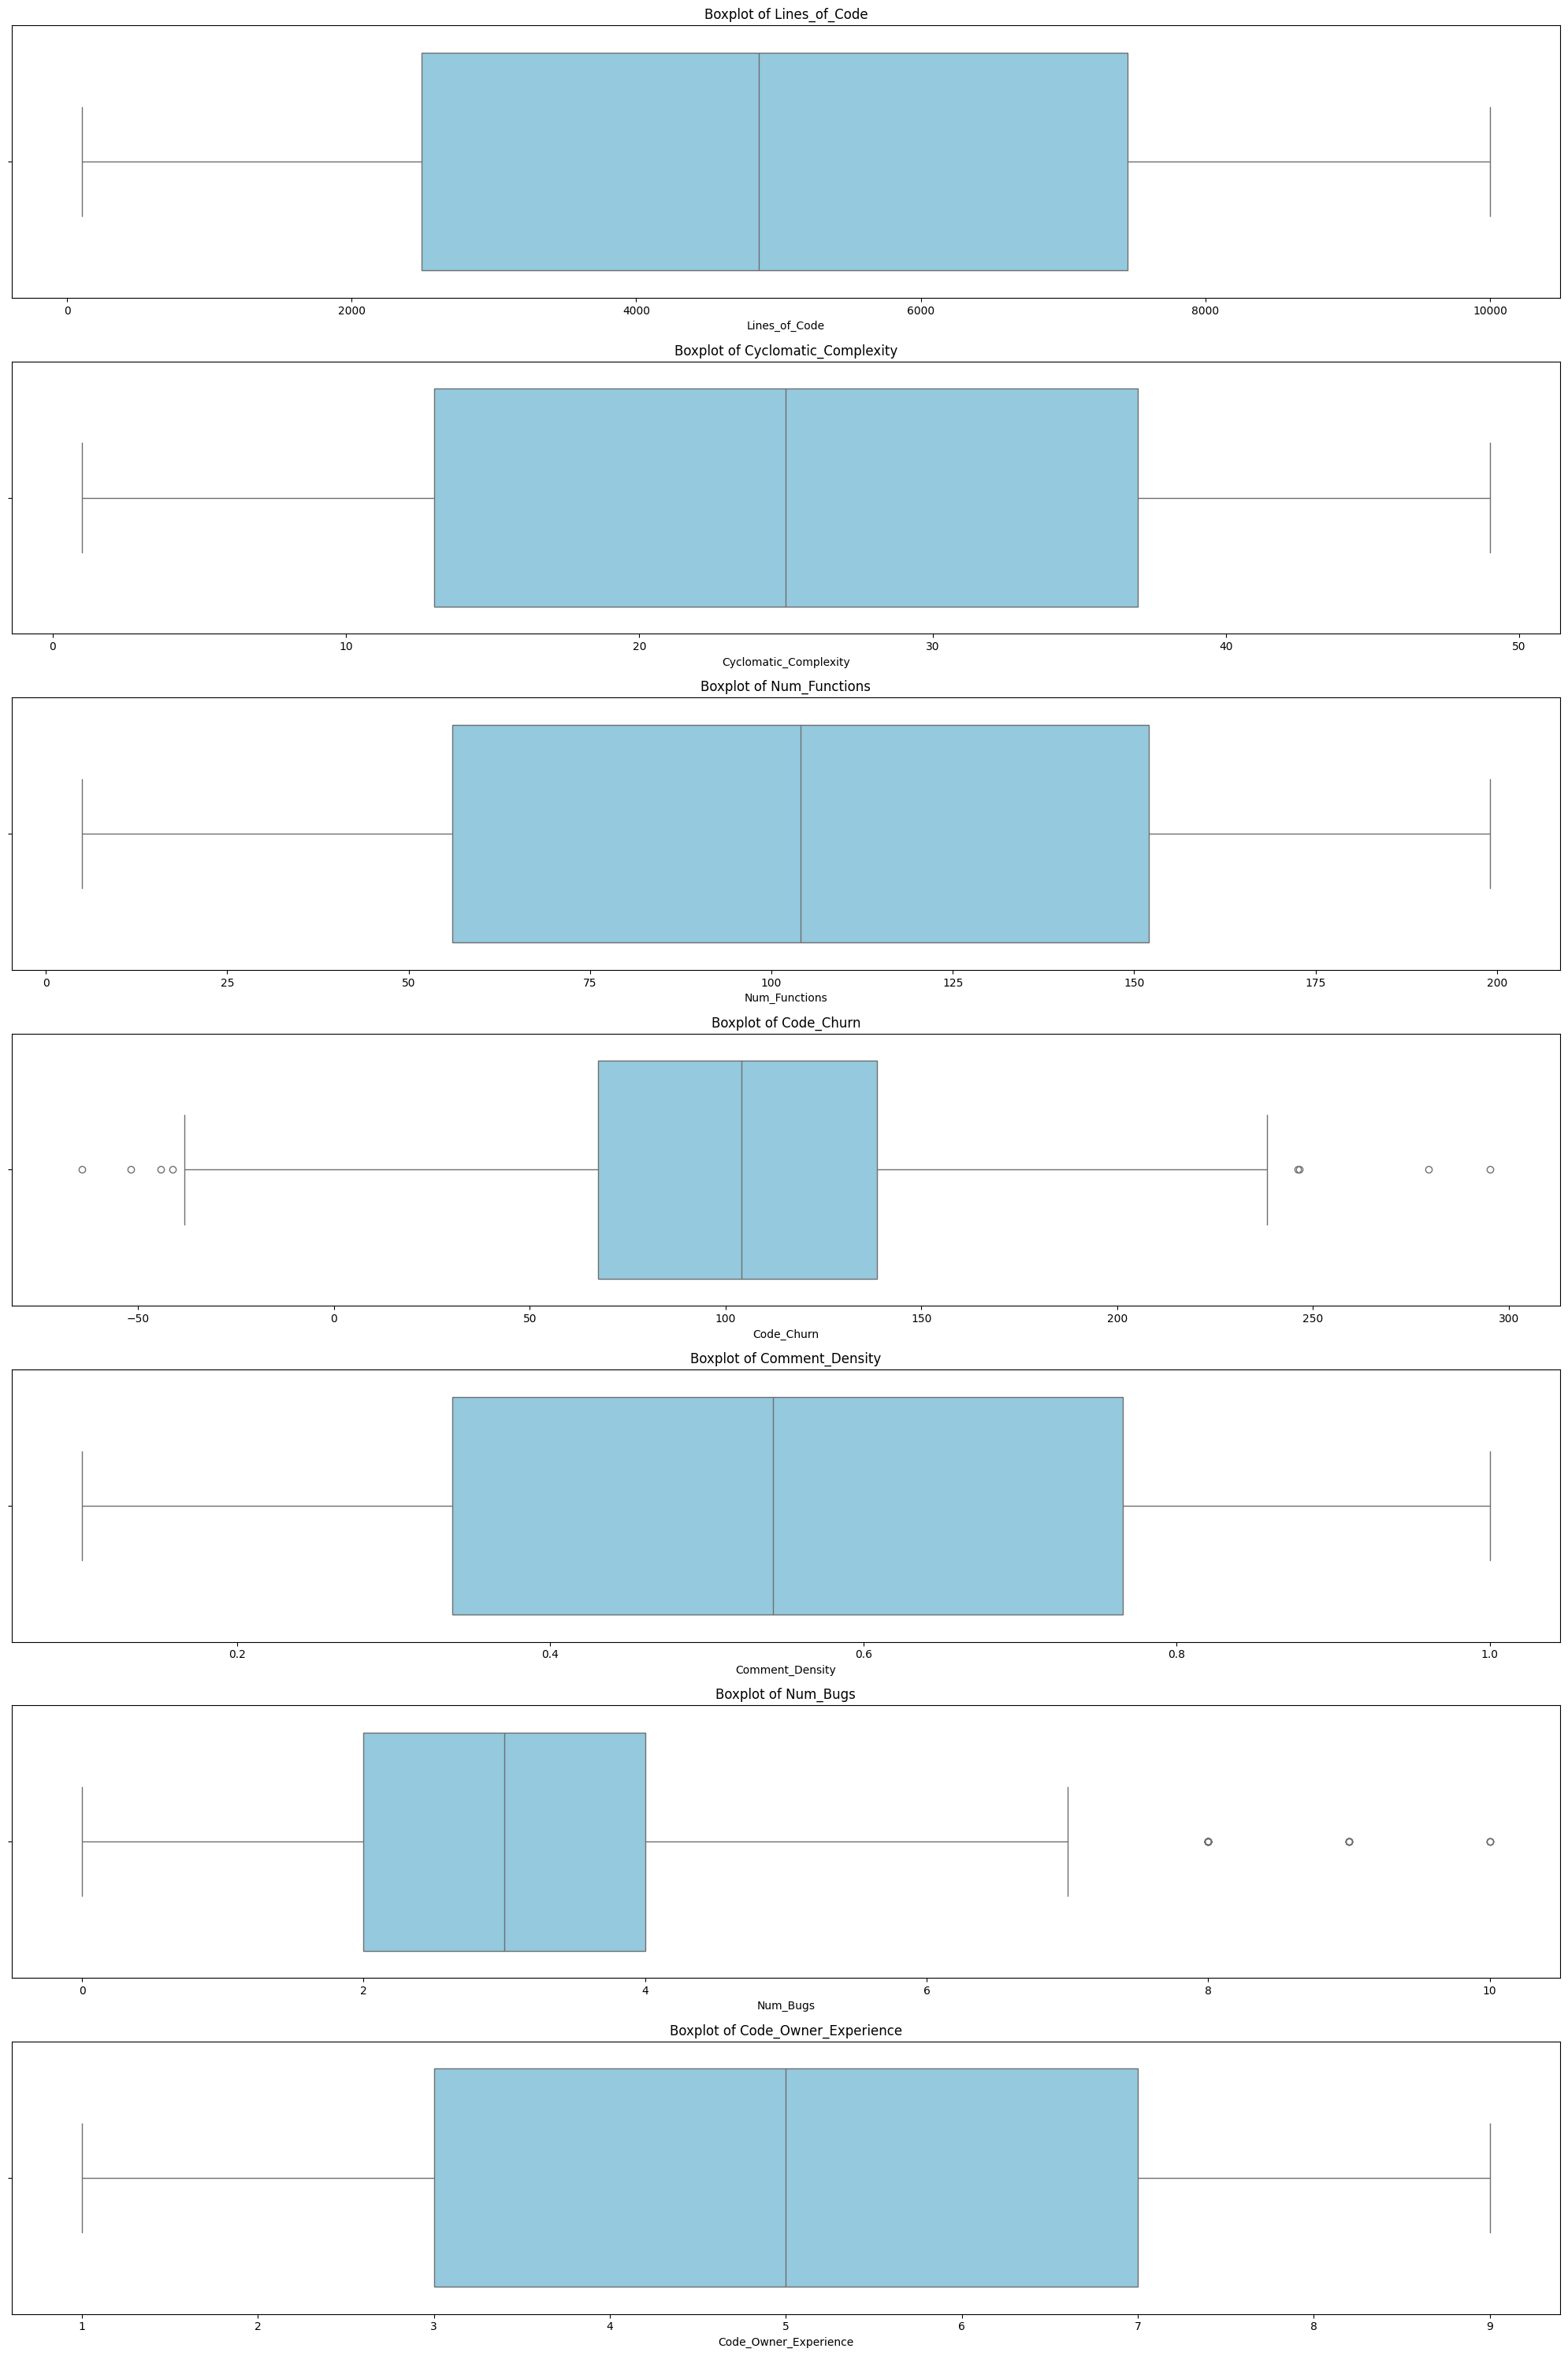

In [883]:
# Select only numerical columns for boxplot analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

###Number unique values in each frame

In [884]:
numerical_data.nunique()

,0
Lines_of_Code,1413
Cyclomatic_Complexity,49
Num_Functions,195
Code_Churn,1520
Comment_Density,1520
Num_Bugs,11
Code_Owner_Experience,9


###**Missing values**

In [885]:
numerical_data.isnull().sum()

,0
Lines_of_Code,80
Cyclomatic_Complexity,0
Num_Functions,0
Code_Churn,80
Comment_Density,80
Num_Bugs,0
Code_Owner_Experience,0


###**Categorical Features**

In [886]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

Has_Unit_Tests    2
Quality_Label     3
dtype: int64


###***Bar plot ***

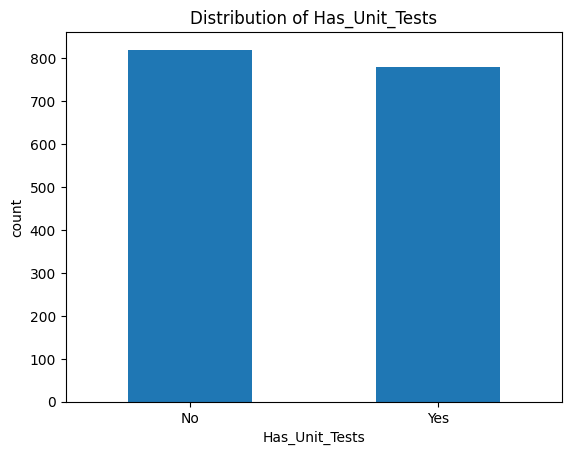

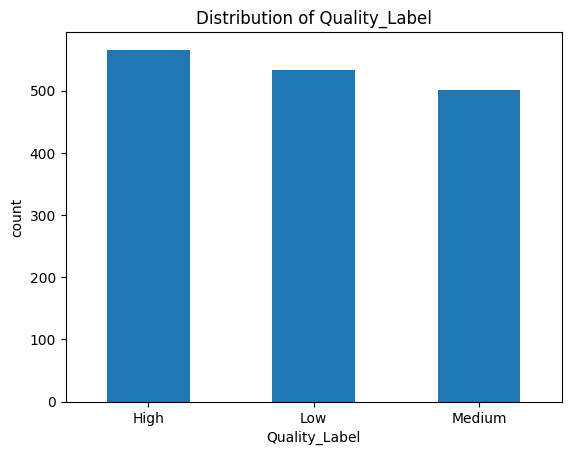

In [887]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

### **Correlation Analysis**

In [888]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Code_Owner_Experience
Lines_of_Code,1.000000,0.046746,-0.026398,0.003710,0.019014,-0.029780,0.015243
Cyclomatic_Complexity,0.046746,1.000000,-0.005937,-0.022347,0.041138,-0.076648,-0.019038
Num_Functions,-0.026398,-0.005937,1.000000,-0.005121,-0.002924,0.007963,0.011028
Code_Churn,0.003710,-0.022347,-0.005121,1.000000,0.010962,-0.015592,0.022090
Comment_Density,0.019014,0.041138,-0.002924,0.010962,1.000000,-0.045190,0.028216
Num_Bugs,-0.029780,-0.076648,0.007963,-0.015592,-0.045190,1.000000,-0.008013
Code_Owner_Experience,0.015243,-0.019038,0.011028,0.022090,0.028216,-0.008013,1.000000


### **Correlation Heatmap plot**

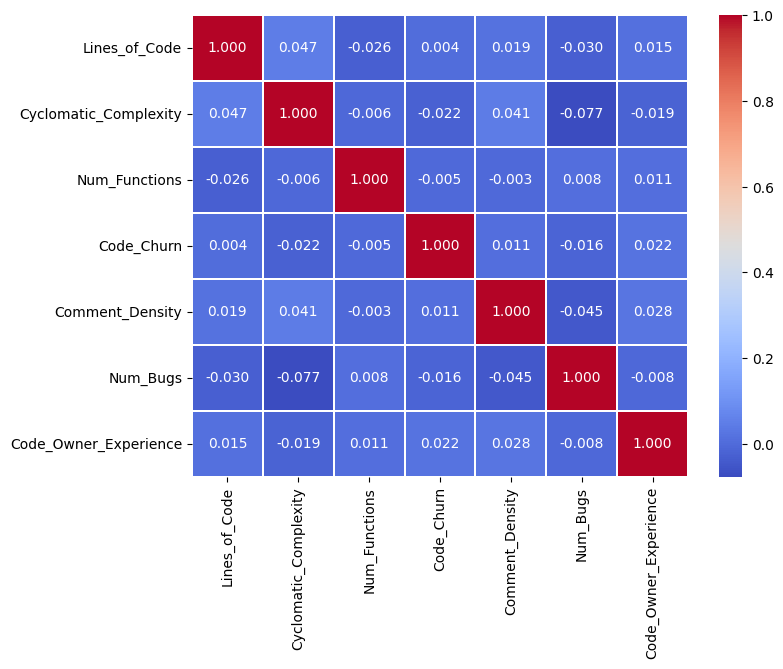

In [889]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

#### **Correlation plot between numerical features and target**

   Lines_of_Code  Cyclomatic_Complexity  Num_Functions  Code_Churn  \
0          356.0                     31            144   69.567047   
1          227.0                     15            104  131.844422   
2         9674.0                     47            141  118.729027   
3         6967.0                     42            107  194.397155   
4         7954.0                     35            114   69.202293   

   Comment_Density  Num_Bugs Has_Unit_Tests  Code_Owner_Experience  \
0         0.467561         2            Yes                      4   
1         0.795643         2             No                      5   
2         0.316839         5             No                      1   
3         0.971883         5            Yes                      3   
4         0.559417         1             No                      8   

   Quality_Label  
0              1  
1              2  
2              2  
3              0  
4              1  


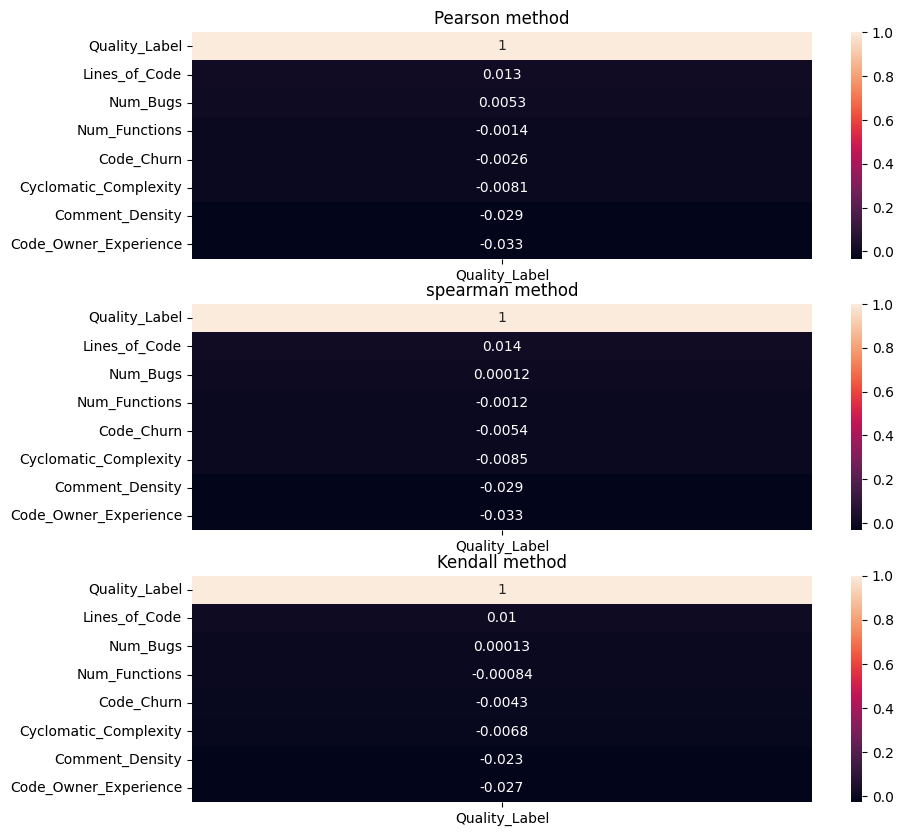

In [890]:
quality_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
# Apply the mapping
df['Quality_Label'] = df['Quality_Label'].map(quality_mapping)
print(df.head(5))
numerical_data_with_target = df[numerical_features + ['Quality_Label']]
numerical_data_with_target.head()

fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = numerical_data_with_target.corr('pearson')[['Quality_Label']].sort_values(by='Quality_Label', ascending=False)
corr2 = numerical_data_with_target.corr('spearman')[['Quality_Label']].sort_values(by='Quality_Label', ascending=False)
corr3 = numerical_data_with_target.corr('kendall')[['Quality_Label']].sort_values(by='Quality_Label', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

### **Check imbalance in the data**
#### We have classification problem so we need to check the balance of the given data.

In [891]:
# Check Imbalance in data
# group instances based on the classes in Quality_Label variable
class_counts = df.groupby("Quality_Label").size()
columns = ['Quality_Label', 'count', 'percentage']
outcome = df['Quality_Label'].unique() # Get unique values from Quality_Label
count = []
percentage = []

# Calculate the percentage of each value of the Quality_Label variable from the total
for val in outcome:
    count.append(class_counts[val])
    percent = (class_counts[val] / len(df)) * 100
    percentage.append(percent)

# Convert the calculated values into a DataFrame
imbalance_df = pd.DataFrame(list(zip(outcome, count, percentage)), columns=columns)
imbalance_df


,Quality_Label,count,percentage
0,1,501,31.3125
1,2,566,35.3750
2,0,533,33.3125


### **Barplot of Outcome vs Percentage**

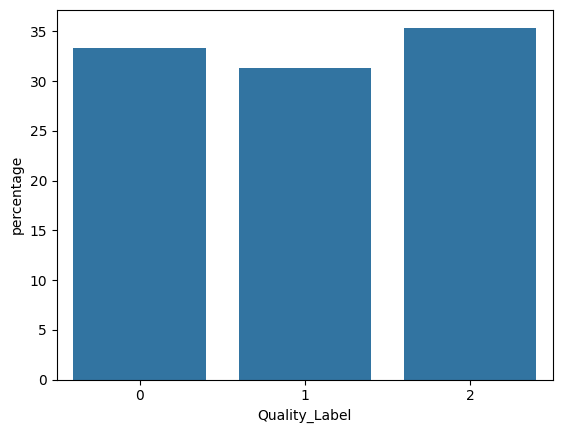

In [892]:
sns.barplot(data=imbalance_df, x='Quality_Label', y='percentage')
plt.show()

###**Density plots of numerical features**

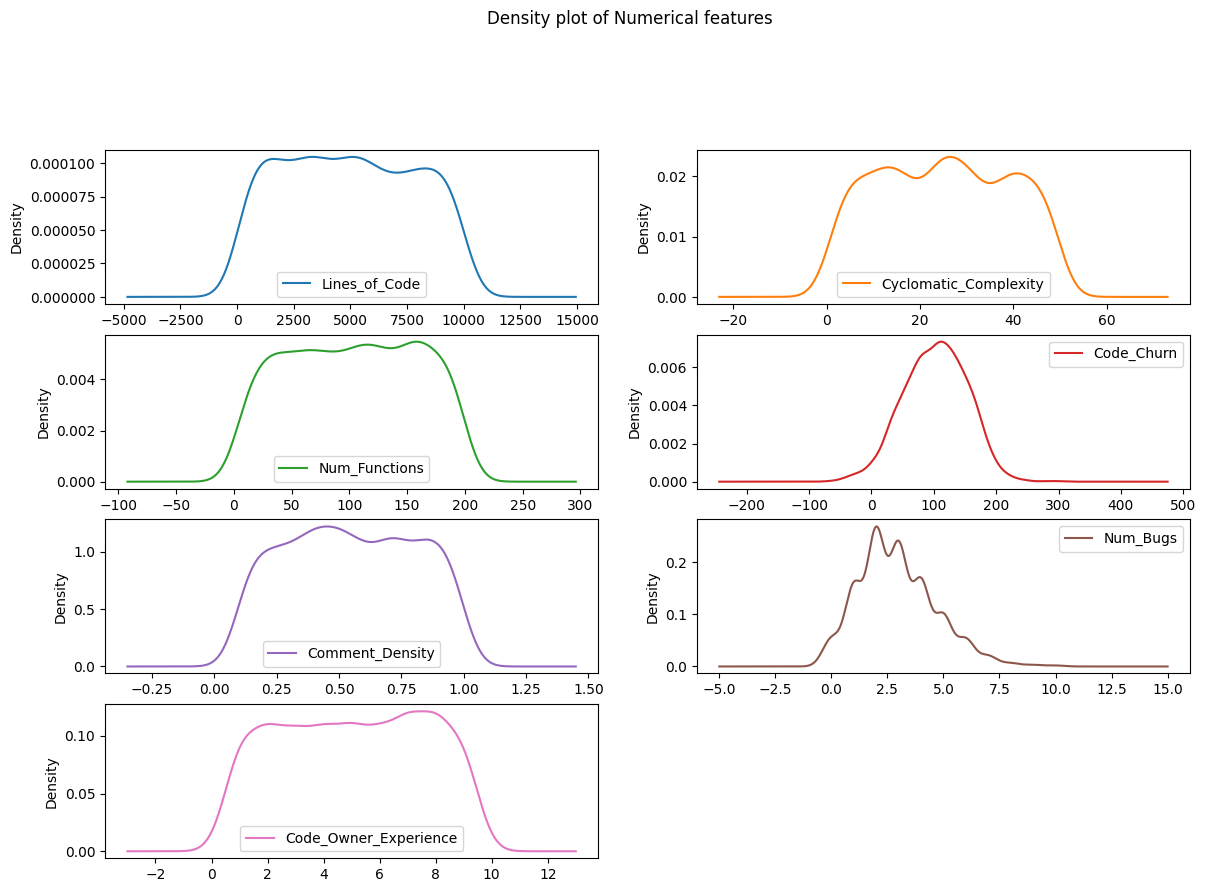

In [893]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

###**DATA PREPROCESSING**

In [894]:
df['Has_Unit_Tests'] = le.fit_transform(df['Has_Unit_Tests']) #yes = 1 no = 0
df

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Has_Unit_Tests,Code_Owner_Experience,Quality_Label
0,356.0,31,144,69.567047,0.467561,2,1,4,1
1,227.0,15,104,131.844422,0.795643,2,0,5,2
2,9674.0,47,141,118.729027,0.316839,5,0,1,2
3,6967.0,42,107,194.397155,0.971883,5,1,3,0
4,7954.0,35,114,69.202293,0.559417,1,0,8,1
...,...,...,...,...,...,...,...,...,...
1595,8883.0,40,31,54.863010,0.928920,3,1,8,0
1596,2175.0,44,25,160.802073,0.696037,3,0,1,0
1597,7872.0,39,47,121.382316,0.461773,3,0,2,2
1598,9660.0,24,55,75.626324,0.999547,2,0,6,0


In [895]:
numerical_data.isnull().sum()

,0
Lines_of_Code,80
Cyclomatic_Complexity,0
Num_Functions,0
Code_Churn,80
Comment_Density,80
Num_Bugs,0
Code_Owner_Experience,0


In [896]:
numerical_data.isnull().sum()


,0
Lines_of_Code,80
Cyclomatic_Complexity,0
Num_Functions,0
Code_Churn,80
Comment_Density,80
Num_Bugs,0
Code_Owner_Experience,0


In [897]:
df['Lines_of_Code'].fillna(df['Lines_of_Code'].mean(), inplace=True)
df['Comment_Density'].fillna(df['Comment_Density'].mean(), inplace=True)
df.dropna(subset=['Code_Churn'], inplace=True)

<ipython-input-897-d069a0d4014b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lines_of_Code'].fillna(df['Lines_of_Code'].mean(), inplace=True)
<ipython-input-897-d069a0d4014b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [898]:
df.isnull().sum()

,0
Lines_of_Code,0
Cyclomatic_Complexity,0
Num_Functions,0
Code_Churn,0
Comment_Density,0
Num_Bugs,0
Has_Unit_Tests,0
Code_Owner_Experience,0
Quality_Label,0


In [899]:
df.shape

(1520, 9)

In [900]:
# List of numerical features to scale
numerical_features = ['Lines_of_Code', 'Code_Churn', 'Num_Bugs',
                      'Cyclomatic_Complexity', 'Num_Functions',
                      'Comment_Density', 'Code_Owner_Experience']
# Initialize scaler
scaler = MinMaxScaler()
# Apply scaling to numerical columns only
df[numerical_features] = scaler.fit_transform(df[numerical_features])

###**DATA SPLITTING**

In [901]:
# Separate features and target
X = df.drop('Quality_Label', axis=1)
y = df['Quality_Label']

# Stratified split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)


###**Model running**

In [902]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.31798245614035087
              precision    recall  f1-score   support

           0       0.27      0.19      0.23       154
           1       0.30      0.35      0.32       142
           2       0.37      0.41      0.39       160

    accuracy                           0.32       456
   macro avg       0.31      0.32      0.31       456
weighted avg       0.31      0.32      0.31       456



In [903]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.33771929824561403
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       154
           1       0.33      0.31      0.32       142
           2       0.36      0.38      0.37       160

    accuracy                           0.34       456
   macro avg       0.34      0.34      0.34       456
weighted avg       0.34      0.34      0.34       456



In [867]:
# One-hot encode target labels (3 classes: Low=0, Medium=1, High=2)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)
# Evaluate the model
loss, nn_acc = model.evaluate(X_test, y_test_cat)
print(f"✅ Test Accuracy: {nn_acc * 100:.2f}%")
# Make predictions
y_pred_probs = model.predict(X_test)
nn_pred = tf.argmax(y_pred_probs, axis=1).numpy()
# Classification Report
print("\n📊 Neural Network Classification Report:\n")
print(classification_report(y_test, nn_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3521 - loss: 1.1028 - val_accuracy: 0.3084 - val_loss: 1.0970
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3572 - loss: 1.0944 - val_accuracy: 0.3364 - val_loss: 1.0948
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3779 - loss: 1.0931 - val_accuracy: 0.3458 - val_loss: 1.0977
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3919 - loss: 1.0816 - val_accuracy: 0.3178 - val_loss: 1.0989
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 1.0951 - val_accuracy: 0.3458 - val_loss: 1.0981
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3723 - loss: 1.0887 - val_accuracy: 0.3364 - val_loss: 1.0926
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3976 - loss: 1.0865 - val_accuracy: 0.3271 - val_loss: 1.1025
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4015 - loss: 1.0900 - val_accuracy: 0.2897 - val_loss:

##Model Evaluation

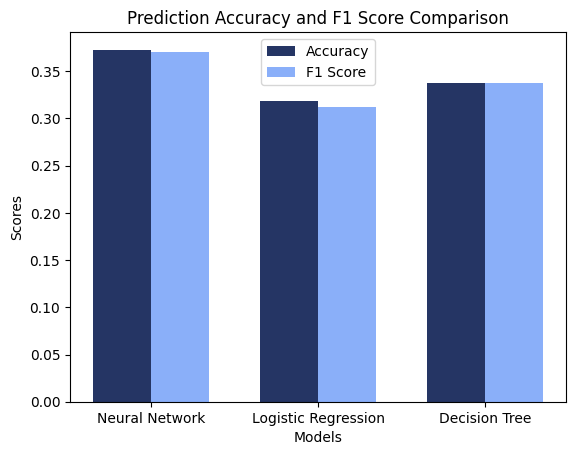

In [868]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Use y_pred_lr for Logistic Regression
accuracy_dt = accuracy_score(y_test, y_pred_tree)  # Use y_pred_tree for Decision Tree

f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted') # Use y_pred_lr
f1_dt = f1_score(y_test, y_pred_tree, average='weighted') # Use y_pred_tree

models = ['Neural Network', 'Logistic Regression', 'Decision Tree']
accuracy_scores = [accuracy_nn, accuracy_lr, accuracy_dt]
f1_scores = [f1_nn, f1_lr, f1_dt]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='#253564')
plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='#8AAFF9')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Prediction Accuracy and F1 Score Comparison')
plt.xticks(x, models)
plt.legend()
plt.show()


Confusion Matrix of the trained models

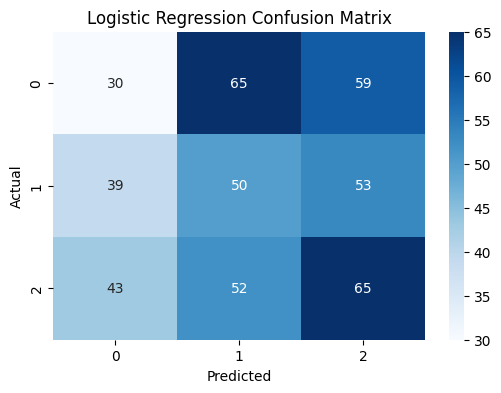

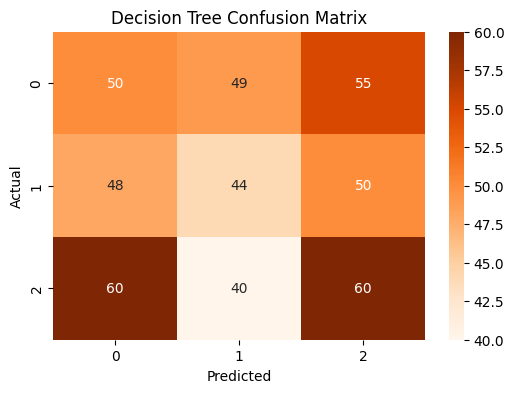

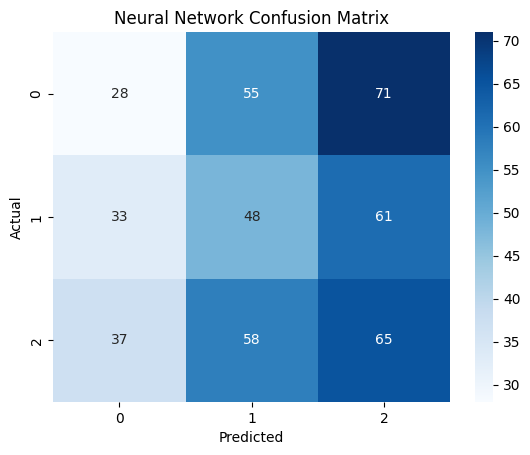

In [869]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap="Oranges")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Neural Network
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Precision, recall comparison of each model.**

                 Model  Precision    Recall  F1-Score
0  Logistic Regression   0.311497  0.317723  0.311648
1        Decision Tree   0.336973  0.336511  0.336581
2       Neural Network   0.304600  0.308699  0.301067


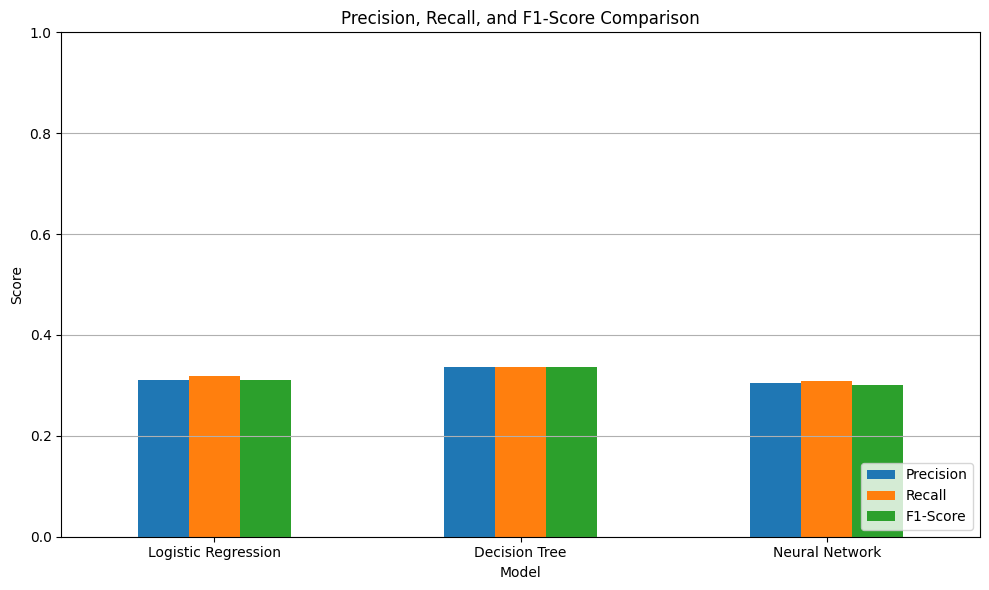

In [870]:
# Get classification reports as dictionaries
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_nn = classification_report(y_test, nn_pred, output_dict=True)

# Extract macro average metrics (you can also use weighted avg if class imbalance is important)
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network'],
    'Precision': [
        report_lr['macro avg']['precision'],
        report_tree['macro avg']['precision'],
        report_nn['macro avg']['precision']
    ],
    'Recall': [
        report_lr['macro avg']['recall'],
        report_tree['macro avg']['recall'],
        report_nn['macro avg']['recall']
    ],
    'F1-Score': [
        report_lr['macro avg']['f1-score'],
        report_tree['macro avg']['f1-score'],
        report_nn['macro avg']['f1-score']
    ]
})

print(metrics_df)
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

AUC score, ROC curve

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


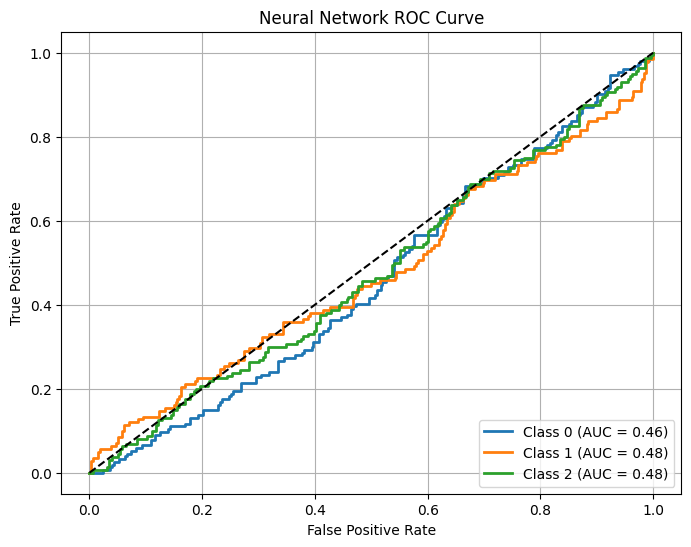

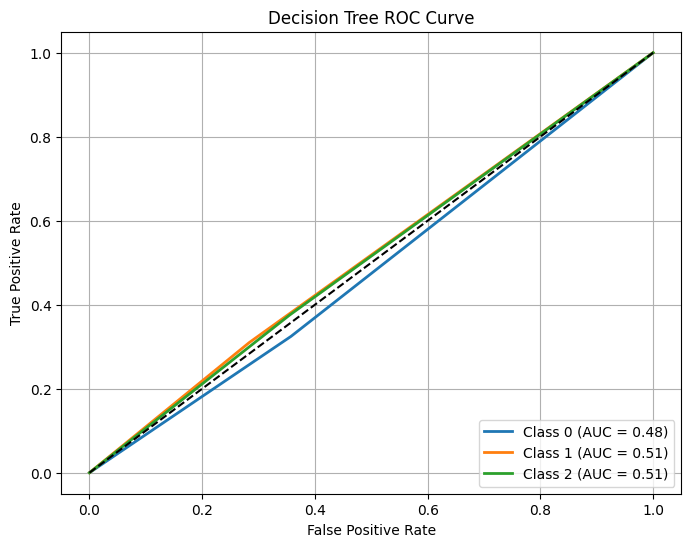

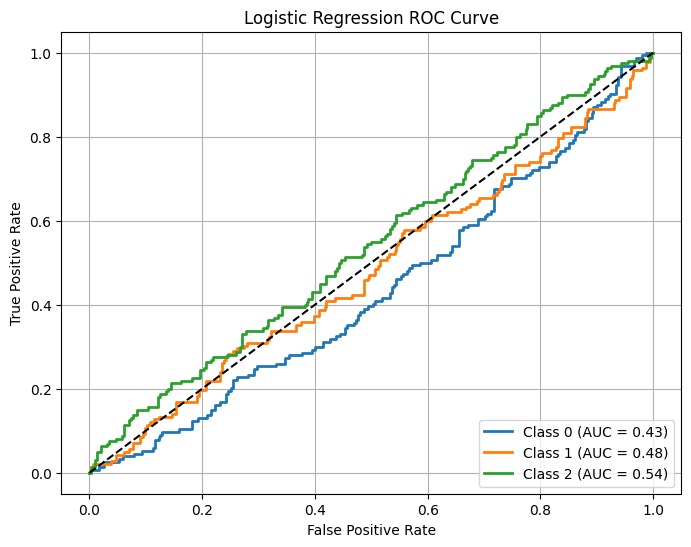

📈 Average AUC Scores:
🔹 Neural Network: 0.4709
🔹 Decision Tree: 0.5023
🔹 Logistic Regression: 0.4851


In [871]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

def plot_roc_auc(model, model_name, x_test, y_test_bin):
    if model_name == "Neural Network":
        y_score = model.predict(x_test)
    else:
        y_score = model.predict_proba(x_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return np.mean(list(roc_auc.values()))

# ROC & AUC for all models
nn_auc = plot_roc_auc(model, "Neural Network", X_test, y_test_bin)
tree_auc = plot_roc_auc(tree, "Decision Tree", X_test, y_test_bin)
lr_auc = plot_roc_auc(log_reg, "Logistic Regression", X_test, y_test_bin)

# Final AUC comparison
print("📈 Average AUC Scores:")
print(f"🔹 Neural Network: {nn_auc:.4f}")
print(f"🔹 Decision Tree: {tree_auc:.4f}")
print(f"🔹 Logistic Regression: {lr_auc:.4f}")

R2 score and Loss

In [872]:
#R² Score (Not meaningful for classification, use with caution)
r2_nn = r2_score(y_test, nn_pred)
r2_tree = r2_score(y_test, y_pred_tree)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"📈 R² Score (Neural Network): {r2_nn:.4f}")
print(f"📈 R² Score (Decision Tree): {r2_tree:.4f}")
print(f"📈 R² Score (Logistic Regression): {r2_lr:.4f}")

# Log Loss (Cross-Entropy Loss)
# For Neural Network (already computed via model.evaluate)
loss, nn_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"🧠 Neural Network Loss: {loss:.4f}")

# For Logistic Regression
log_loss_lr = log_loss(y_test, log_reg.predict_proba(X_test))
print(f"📊 Log Loss (Logistic Regression): {log_loss_lr:.4f}")

# For Decision Tree
log_loss_tree = log_loss(y_test, tree.predict_proba(X_test))
print(f"🌳 Log Loss (Decision Tree): {log_loss_tree:.4f}")

📈 R² Score (Neural Network): -1.0355
📈 R² Score (Decision Tree): -1.0610
📈 R² Score (Logistic Regression): -0.9655
🧠 Neural Network Loss: 1.1542
📊 Log Loss (Logistic Regression): 1.1097
🌳 Log Loss (Decision Tree): 23.8710
